In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("/Users/stanislavprihoda/Documents/Code/Courses/Python-and-ML-courses/Timeseries_Python/_sources/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv",index_col="Month",parse_dates=True)

In [31]:
df.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [32]:
df.tail(3)

,Thousands of Passengers
Month,
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [33]:
df.index.freq='MS'

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [35]:
train_data = df.iloc[:109] #loc[:"date"]
test_data = df.iloc[108:]

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [37]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend="mul",
                                    seasonal="mul",
                                   seasonal_periods=12).fit()

In [38]:
test_predictions = fitted_model.forecast(36)

In [39]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379217
1958-07-01    502.248554
1958-08-01    490.986945
1958-09-01    424.051079
1958-10-01    365.391637
1958-11-01    318.392247
1958-12-01    360.320760
1959-01-01    369.905595
1959-02-01    359.903246
1959-03-01    422.128280
1959-04-01    412.508717
1959-05-01    421.370054
1959-06-01    492.003332
1959-07-01    545.035928
1959-08-01    532.814923
1959-09-01    460.176682
1959-10-01    396.519946
1959-11-01    345.516602
1959-12-01    391.017073
1960-01-01    401.418456
1960-02-01    390.563991
1960-03-01    458.090077
1960-04-01    447.651007
1960-05-01    457.267257
1960-06-01    533.917898
1960-07-01    591.468427
1960-08-01    578.206295
1960-09-01    499.379884
1960-10-01    430.300127
1960-11-01    374.951725
1960-12-01    424.328456
1961-01-01    435.615949
Freq: MS, dtype: float64

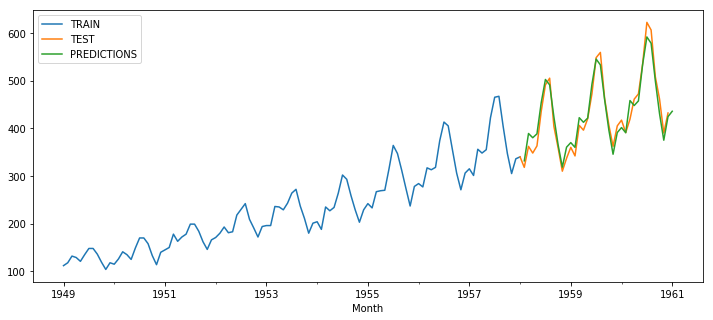

In [42]:
train_data["Thousands of Passengers"].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data["Thousands of Passengers"].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTIONS')

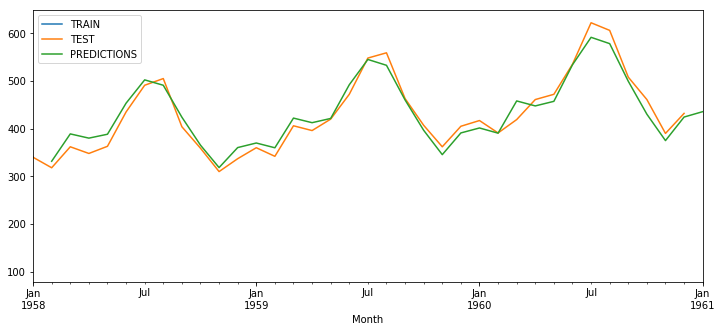

In [43]:
train_data["Thousands of Passengers"].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data["Thousands of Passengers"].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTIONS',xlim=['1958-01-01','1961-01-01'])

In [47]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
MAE = mean_absolute_error(test_data,test_predictions)
MAE

46.30290452191762

In [49]:
MSE = mean_squared_error(test_data,test_predictions)
MSE

3075.328461982647

In [50]:
np.sqrt(MSE)

55.45564409492191

In [51]:
final_model = ExponentialSmoothing(df["Thousands of Passengers"],trend="mul",
                                  seasonal="mul",
                                  seasonal_periods=12).fit()

In [52]:
forecast_predictions = final_model.forecast(36)

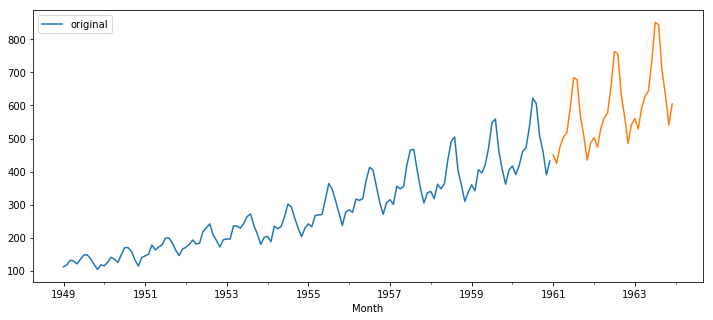

In [53]:
df["Thousands of Passengers"].plot(figsize=(12,5),legend=True,label="original")
forecast_predictions.plot(label="forecast")

### Stationary dataset

In [54]:
df2 = pd.read_csv("/Users/stanislavprihoda/Documents/Code/Courses/Python-and-ML-courses/Timeseries_Python/_sources/TSA_COURSE_NOTEBOOKS/Data/samples.csv",index_col=0,parse_dates=True)

In [56]:
df2.head()

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8


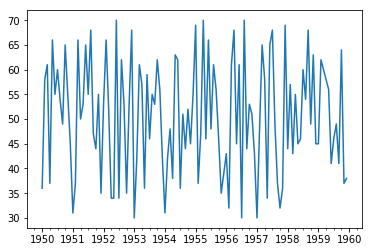

In [58]:
df2['a'].plot()

### Non-stationary dataset

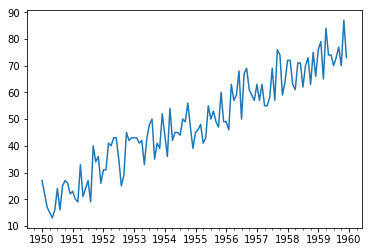

In [59]:
df2['b'].plot()

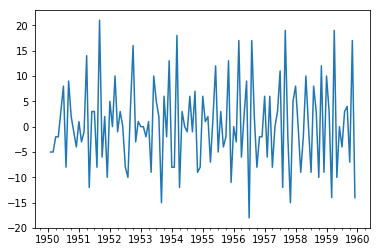

In [63]:
(df2['b']-df2['b'].shift(1)).plot()

In [64]:
from statsmodels.tsa.statespace.tools import diff

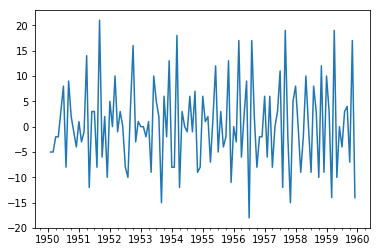

In [66]:
diff(df2['b'],k_diff=1).plot()

### ACF, PACF

In [68]:
import statsmodels.api as sm

In [69]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [72]:
df1 = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [89]:
df1.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [77]:
df2 = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [88]:
df2.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [81]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [83]:
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [84]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [85]:
from pandas.plotting import lag_plot

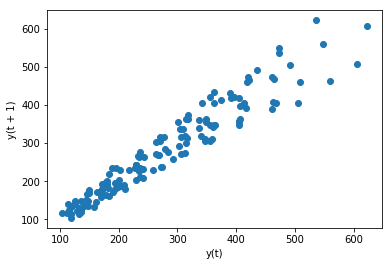

In [86]:
lag_plot(df1["Thousands of Passengers"])

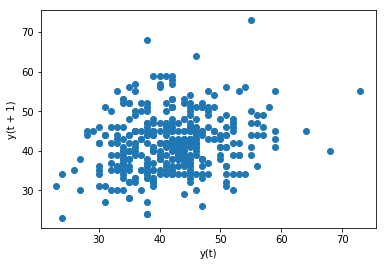

In [90]:
lag_plot(df2['Births'])

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

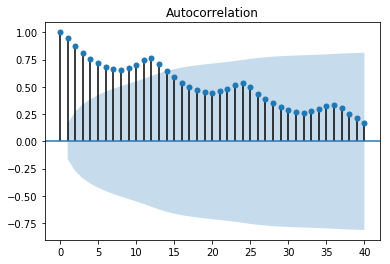

In [94]:
plot_acf(df1,lags=40);

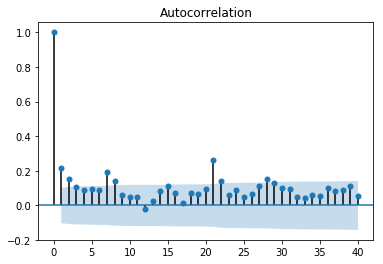

In [97]:
plot_acf(df2, lags=40);

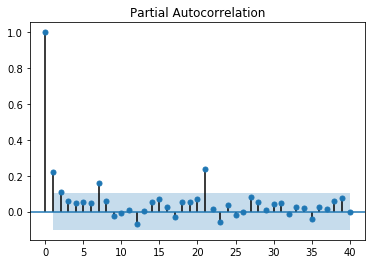

In [100]:
plot_pacf(df2,lags=40);